In [27]:
#def calculate_column_depth(Teq,flux_dayside, remove_mod, orb_sep):
import math
import numpy as np
import os
import shutil
import scipy
import sys
import pandas as pd
from scipy.interpolate import interp1d
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
from scipy import loadtxt, optimize
import os
import sys
%matplotlib notebook
from scipy import loadtxt, optimize
from scipy.interpolate import interp1d

Teq = 500
flux_dayside = 1
remove_mod = '/Users/isaacmalsky/Desktop/profile_remove_heating2.5_0.1_0.24_0.02_9.0'

e = 2.7182818284
T,P, k_r, k_p = loadtxt('/Users/isaacmalsky/Desktop/Exo/OpacityTableSolarMetal.txt' ,unpack=True, skiprows =38, usecols=[0,1,11,12]) #6000K
Opacity_function = interpolate.interp2d(T,P,k_p)

zone, mass, logR, logT, logRho, logP = loadtxt(remove_mod, unpack=True, skiprows =6, usecols=[0,1,2,3,4,5])                 

RadiusList = [(6.957e10)*(10**item) for item in logR]
TemperatureList = [10**item for item in logT]
PressureList = [10**item for item in logP]

Pressure_function = interp1d(RadiusList, PressureList, fill_value="extrapolate")
Column_depth = 2 / (Opacity_function(Teq, 1e6))

for i in range(1000):
    Pressure = (Pressure_function(Column_depth[0]))
    Column_depth = 2 / (Opacity_function(Teq, Pressure))
    
print ("Pressure: ", Pressure)
print ("Column Depth: ", Column_depth[0])

#plt.gca().invert_yaxis()
plt.plot(TemperatureList, logP,'b')
    
plt.xlabel('Temperature (K)', fontsize = 14)
plt.ylabel('Pressure log10(Pa)', fontsize = 14)
#plt.savefig('/Users/isaacmalsky/Desktop/05Press48.png',dpi=500)



/usr/local/anaconda3/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:975: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=57,22 m=1060 fp=0.356815 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:975: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=57,22 m=1060 fp=0.356815 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:43: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and differen

<IPython.core.display.Javascript object>


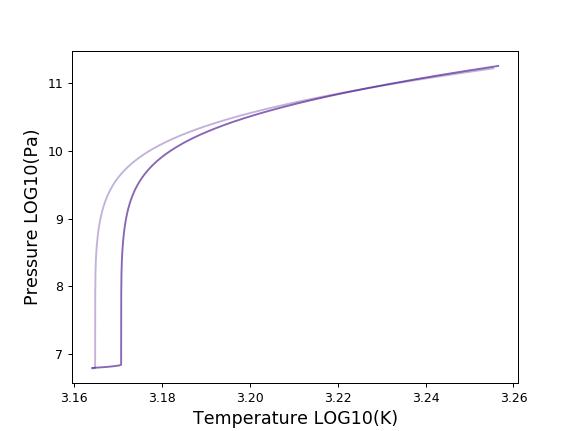

In [10]:
#def calculate_column_depth(Teq,flux_dayside, remove_mod, orb_sep):
import math
import numpy as np
import os
import shutil
import scipy
from scipy import loadtxt, optimize
import sys
import time
import random
import pandas as pd
from scipy.interpolate import interp1d
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
from scipy import loadtxt, optimize
import os
import sys
import os.path
import os.path
import shutil
%matplotlib notebook
from scipy import loadtxt, optimize
from collections import defaultdict
from scipy.interpolate import interp1d





e = 2.7182818284


remove_mod1 = '/Users/isaacmalsky/Desktop/NoMassLoss/evolve_10_0.025_0.18_0.02_0.25_9.0_0.05.mod'
remove_mod2 = '/Users/isaacmalsky/Desktop/NoMassLoss/evolve_10_0.025_0.48_0.02_0.25_9.0_0.05.mod'

T,P, k_r, k_p = loadtxt('/Users/isaacmalsky/Desktop/Exo/OpacityTableSolarMetal.txt' ,unpack=True, skiprows =38, usecols=[0,1,11,12]) #6000K
opacity_function = interpolate.interp2d(T,P,k_p)
test = np.genfromtxt(remove_mod1, skip_header = 17, usecols=0)
test = pd.read_csv(remove_mod1, sep='     ', header=None, skiprows = 20)
length = (len(test[0]))
data = pd.read_csv(remove_mod1, sep='     ', header=None, skiprows = 20, nrows = (length - 20))

lnT = (data[1])
lnR = (data[2])
lnPgas = (data[5])


lnT = [lnT[i] for i in range(len(lnT))]
lnR = [lnR[i] for i in range(len(lnR))]
lnPgas = [lnPgas[i] for i in range(len(lnPgas))]


lnT = [element.replace('D+','e') for element in lnT]
T = []
for item in lnT:
    T.append(e ** float(item))

lnR = [element.replace('D+','e') for element in lnR]

lnR = [i[:22] for i in lnR]
lnPgas = [i[:22] for i in lnPgas]
lnT1 = [i[:21] for i in lnT]

R = []
max_rad = e ** float(lnR[0])
for item in lnR:
    R.append(abs(e ** float(item) - max_rad))

lnPgas = [element.replace('D+','e') for element in lnPgas]
Pgas1 = []
for item in lnPgas:
    Pgas1.append(e ** float(item))


    
    
    
test = pd.read_csv(remove_mod2, sep='     ', header=None, skiprows = 20)
length = (len(test[0]))
data = pd.read_csv(remove_mod2, sep='     ', header=None, skiprows = 20, nrows = (length - 20))

lnT = (data[1])
lnR = (data[2])
lnPgas = (data[5])


lnT = [lnT[i] for i in range(len(lnT))]
lnR = [lnR[i] for i in range(len(lnR))]
lnPgas = [lnPgas[i] for i in range(len(lnPgas))]


lnT = [element.replace('D+','e') for element in lnT]
T = []
for item in lnT:
    T.append(e ** float(item))

lnR = [element.replace('D+','e') for element in lnR]

lnR = [i[:22] for i in lnR]
lnPgas = [i[:22] for i in lnPgas]
lnT2 = [i[:21] for i in lnT]

R = []
max_rad = e ** float(lnR[0])
for item in lnR:
    R.append(abs(e ** float(item) - max_rad))

lnPgas = [element.replace('D+','e') for element in lnPgas]
Pgas2 = []
for item in lnPgas:
    Pgas2.append(e ** float(item))

        
        
        
        
        
        
        
        
"""

test = np.genfromtxt(remove_mod3, skip_header = 17, usecols=0)
test = pd.read_csv(remove_mod3, sep='     ', header=None, skiprows = 20)
length = (len(test[0]))
data = pd.read_csv(remove_mod3, sep='     ', header=None, skiprows = 20, nrows = (length - 20))

lnT = (data[1])
lnR = (data[2])
lnPgas = (data[5])


lnT = [lnT[i] for i in range(len(lnT))]
lnR = [lnR[i] for i in range(len(lnR))]
lnPgas = [lnPgas[i] for i in range(len(lnPgas))]


lnT = [element.replace('D+','e') for element in lnT]
T = []
for item in lnT:
    T.append(e ** float(item))

lnR = [element.replace('D+','e') for element in lnR]

lnR = [i[:22] for i in lnR]
lnPgas = [i[:22] for i in lnPgas]
lnT3 = [i[:21] for i in lnT]

R = []
max_rad = e ** float(lnR[0])
for item in lnR:
    R.append(abs(e ** float(item) - max_rad))

lnPgas = [element.replace('D+','e') for element in lnPgas]
Pgas3 = []
for item in lnPgas:
    Pgas3.append(e ** float(item))


        
        
        
        
        
        
    
    
test = np.genfromtxt(remove_mod4, skip_header = 17, usecols=0)
test = pd.read_csv(remove_mod4, sep='     ', header=None, skiprows = 20)
length = (len(test[0]))
data = pd.read_csv(remove_mod4, sep='     ', header=None, skiprows = 20, nrows = (length - 20))

lnT = (data[1])
lnR = (data[2])
lnPgas = (data[5])


lnT = [lnT[i] for i in range(len(lnT))]
lnR = [lnR[i] for i in range(len(lnR))]
lnPgas = [lnPgas[i] for i in range(len(lnPgas))]


lnT = [element.replace('D+','e') for element in lnT]
T = []
for item in lnT:
    T.append(e ** float(item))

lnR = [element.replace('D+','e') for element in lnR]

lnR = [i[:22] for i in lnR]
lnPgas = [i[:22] for i in lnPgas]
lnT4 = [i[:21] for i in lnT]
print (lnT4)
R = []
max_rad = e ** float(lnR[0])
for item in lnR:
    R.append(abs(e ** float(item) - max_rad))

lnPgas = [element.replace('D+','e') for element in lnPgas]
Pgas4 = []
for item in lnPgas:
    Pgas4.append(e ** float(item))
"""
T1 = []   
T2 = []
#T3 = []
#T4 = []


     
for item in lnT1:
    T1.append(e ** float(item))
for item in lnT2:
    T2.append(e ** float(item))
#for item in lnT3:
#    T3.append(e ** float(item))
#for item in lnT4:
#    T4.append(e ** float(item))
    

    
plt.xlabel('Temperature LOG10(K)', fontsize = 14)
plt.ylabel('Pressure LOG10(Pa)', fontsize = 14)
    


plt.plot(np.log10(T1), np.log10(Pgas1),'#380282', alpha = .3)
plt.plot(np.log10(T2), np.log10(Pgas2),'#380282', alpha = .6)
#plt.plot(np.log10(T3), np.log10(Pgas3),'#380282', alpha = .8)
#plt.plot(np.log10(T4), np.log10(Pgas4),'#380282', alpha = 1.0)


#plt.savefig('/Users/isaacmalsky/Desktop/HeliumDifference',dpi=500)

Pressure:  226538950131.49216
Column Depth:  8.94951225752


/usr/local/anaconda3/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:975: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=57,22 m=1060 fp=0.356815 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


<IPython.core.display.Javascript object>


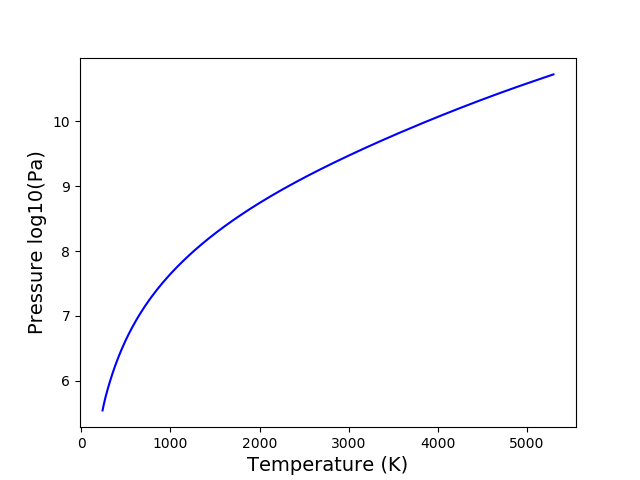